1. Download any Multi Dimensional Classification Dataset from UCI repository.
2. Ignore the class labels and perform Clustering.
3. Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
4. Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

[UCI classification datsets repository link for reference]([https://archive.ics.uci.edu/ml/datasets.php?task=cla&sort=nameUp&view=table)

Bank Marketing Dataset chosen from [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [60]:
# This assignment is done by CS20B1044 Avinash R Changrani
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Read the data
df = pd.read_csv("./bank/bank.csv",  sep=';')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [62]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [63]:
# Ignore the class labels and perform Clustering.
# remove categorical attributes
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y'], axis=1)

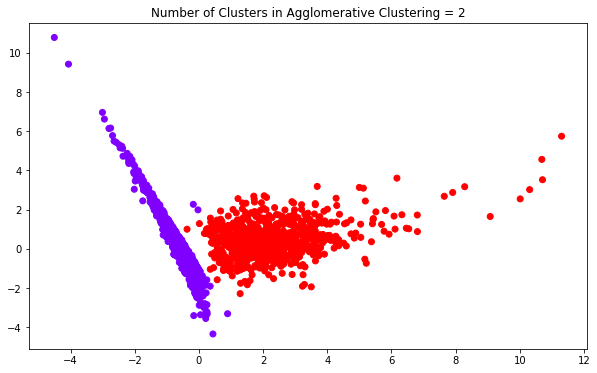

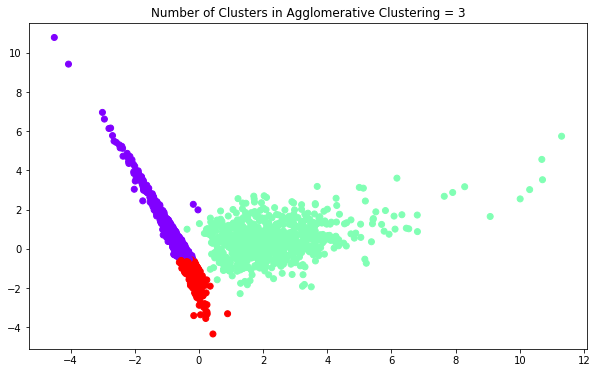

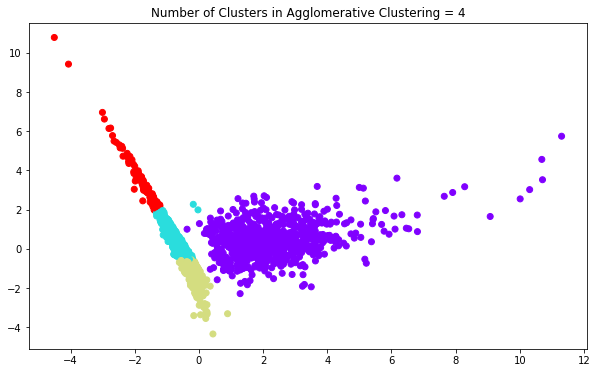

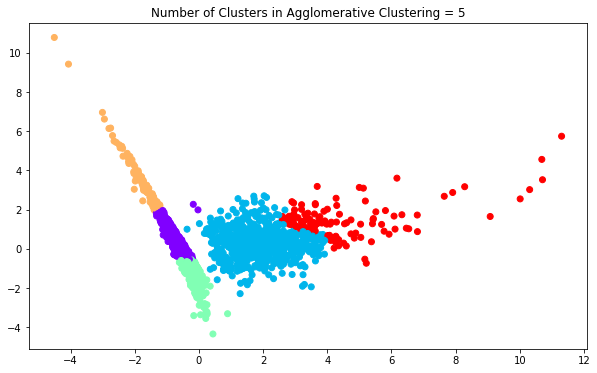

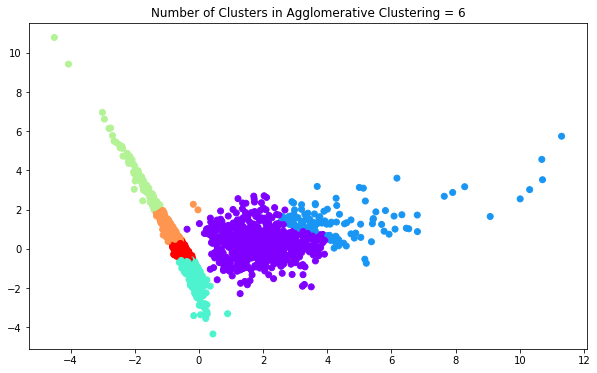

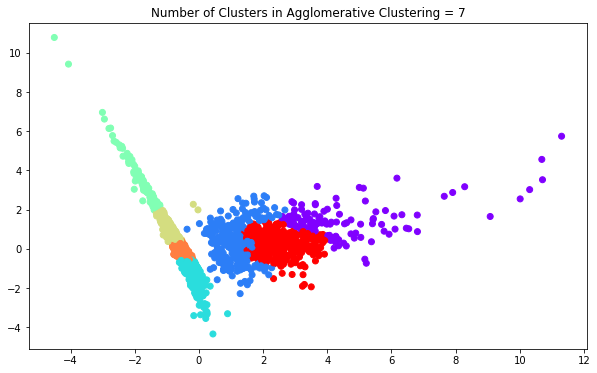

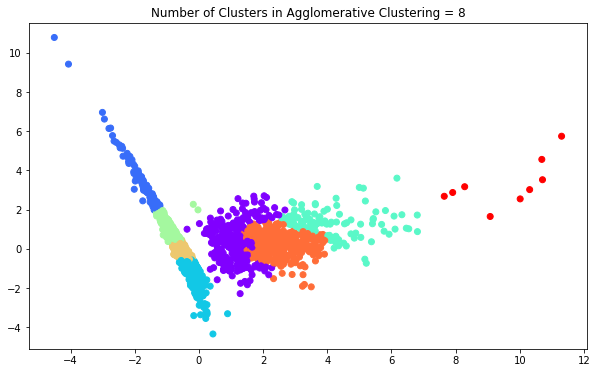

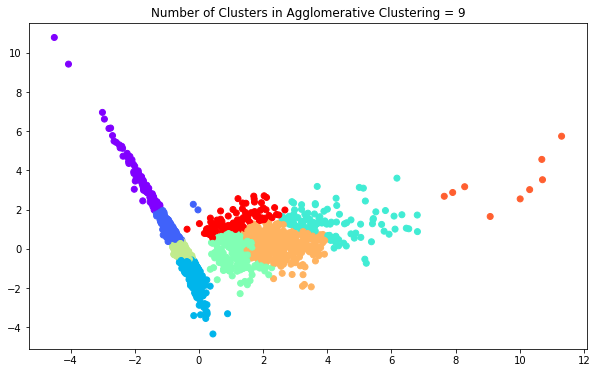

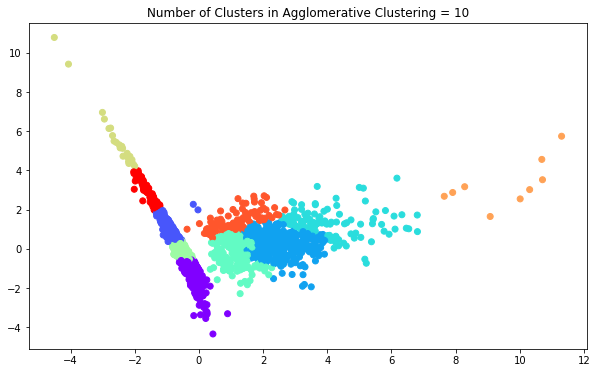

In [64]:
# Experiment with various clustering techniques (Agglomerative , Kmeans...) and number of clusters (3 cluster, 4 clusters, ...)
# perform Agglomerative Clustering on df
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

k_values = [2,3,4,5,6,7,8,9,10]
agg_labels = []

# scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# perform PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)
x_pca = pca.transform(scaled_df)

# perform Agglomerative Clustering
for k in k_values:
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(x_pca)
    agg_labels.append(agg.labels_)
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=agg.labels_,cmap='rainbow')
    plt.title("Number of Clusters in Agglomerative Clustering = " + str(k))
    plt.show()

# No proper clustering without PCA
# agg = AgglomerativeClustering(n_clusters=3)
# plt.figure(figsize=(10,6))
# plt.scatter(scaled_df[:,0],scaled_df[:,1],c=agg.labels_,cmap='rainbow')

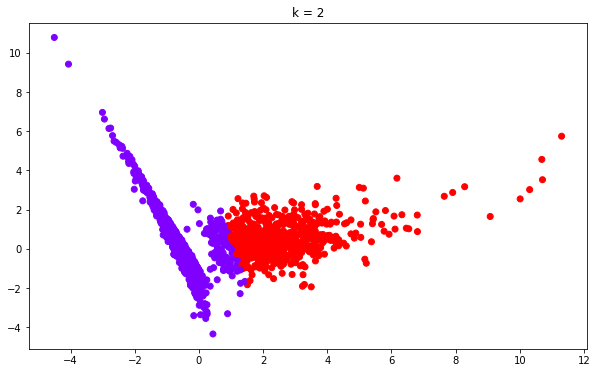

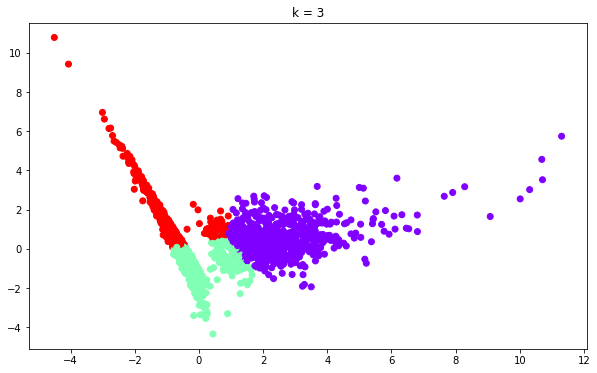

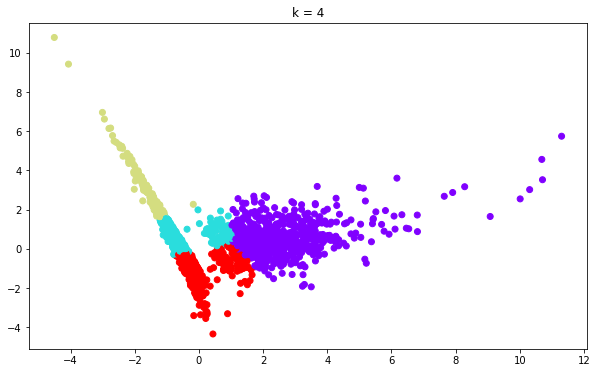

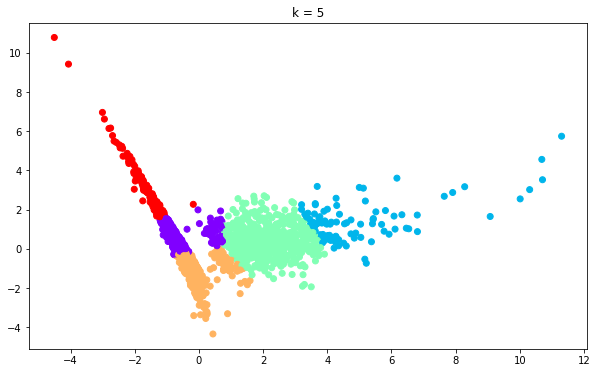

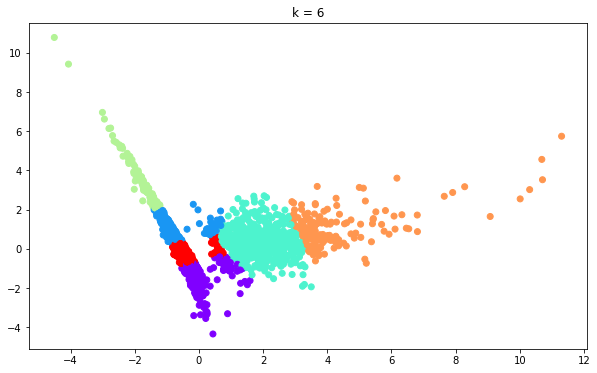

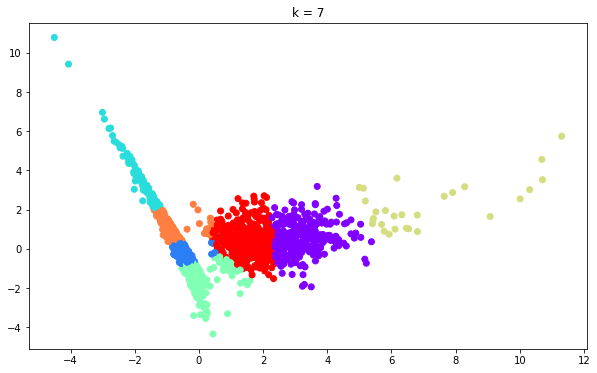

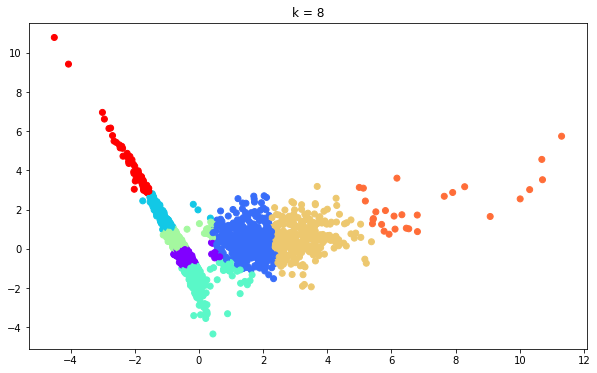

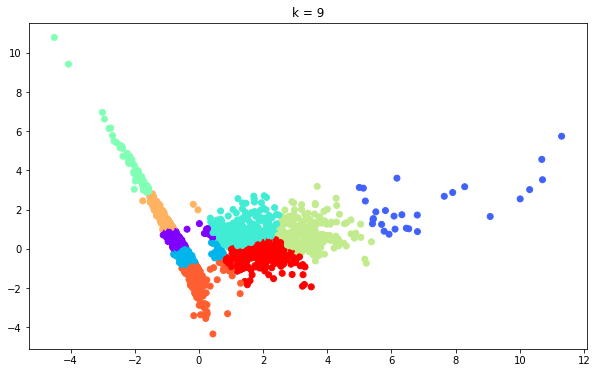

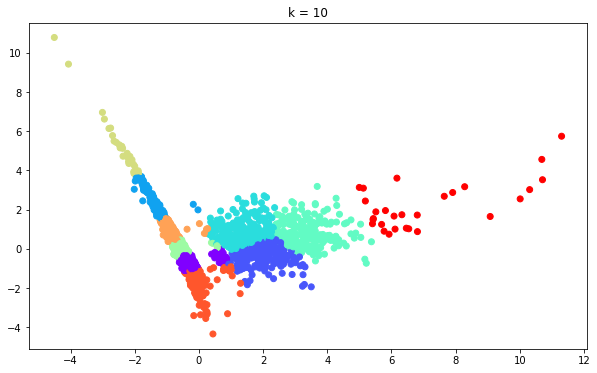

In [65]:
# perform KMeans Clustering on df
from sklearn.cluster import KMeans

sse = []
kmeans_labels = []

# perform KMeans Clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)
    kmeans_labels.append(kmeans.labels_)
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_,cmap='rainbow')
    plt.title("k = " + str(k))
    plt.show()


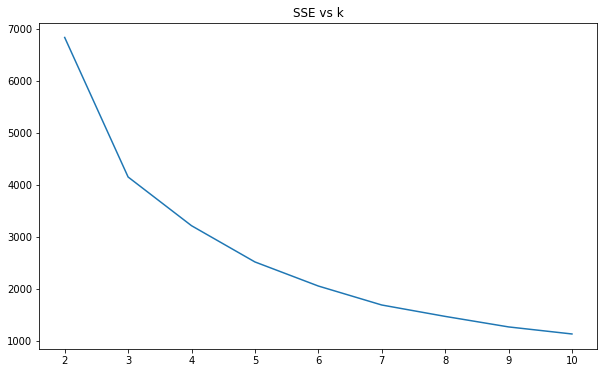

In [66]:
# plot SSE for different k values 
plt.figure(figsize=(10,6))
plt.plot(k_values,sse)
plt.title("SSE vs k")
plt.show()

# We can observe the Knee point at k=3

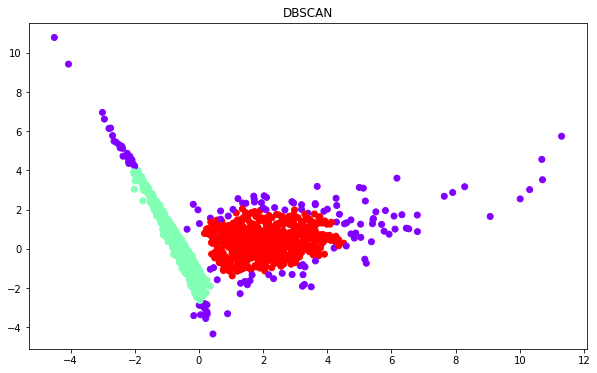

In [67]:
# performing DBSCAN Clustering on df
from sklearn.cluster import DBSCAN

# performing DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(x_pca)
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dbscan.labels_,cmap='rainbow')
plt.title("DBSCAN")
plt.show()

In [68]:
# Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.

# Ground truth
ground_truth = pd.read_csv("./bank/bank.csv",  sep=';')
ground_truth = ground_truth['y']
ground_truth = ground_truth.replace('yes', 1)
ground_truth = ground_truth.replace('no', 0)

# Rand Index
from sklearn.metrics.cluster import rand_score

for i in range(len(k_values)):
    print("For k = " + str(k_values[i]))
    print("Rand Index for Agglomerative Clustering: " + str(rand_score(ground_truth, agg_labels[i])) + " and KMeans Clustering: " + str(rand_score(ground_truth, kmeans_labels[i])))

# Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score

for i in range(len(k_values)):
    print("For k = " + str(k_values[i]))
    print("Adjusted Rand Index for Agglomerative Clustering: " + str(adjusted_rand_score(ground_truth, agg_labels[i])) + " and KMeans Clustering: " + str(adjusted_rand_score(ground_truth, kmeans_labels[i])))


For k = 2
Rand Index for Agglomerative Clustering: 0.6631366308260566 and KMeans Clustering: 0.676284125408859
For k = 3
Rand Index for Agglomerative Clustering: 0.4717877045762841 and KMeans Clustering: 0.4547376745296776
For k = 4
Rand Index for Agglomerative Clustering: 0.44871553204025266 and KMeans Clustering: 0.4213388650408223
For k = 5
Rand Index for Agglomerative Clustering: 0.4460958007175952 and KMeans Clustering: 0.41641728961992514
For k = 6
Rand Index for Agglomerative Clustering: 0.35133565484963974 and KMeans Clustering: 0.36147839091124406
For k = 7
Rand Index for Agglomerative Clustering: 0.3480696768081304 and KMeans Clustering: 0.3585441978730526
For k = 8
Rand Index for Agglomerative Clustering: 0.3480150644093542 and KMeans Clustering: 0.3372514303946382
For k = 9
Rand Index for Agglomerative Clustering: 0.34753353573197254 and KMeans Clustering: 0.33514121905052724
For k = 10
Rand Index for Agglomerative Clustering: 0.34732467756174235 and KMeans Clustering: 0.31